In [57]:
import numpy as np
from machinedesign.viz import grid_of_images_default
from keras.models import Model
from sklearn.manifold import TSNE
from skimage.io import imsave
import keras.backend as K
from machinedesign.autoencoder.interface import load
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
dataset = '../../data/digits.npz'
data = np.load(dataset)
Xtrue = data['X']
ytrue = data['y'] if 'y' in data else None
Xtrue = Xtrue.astype(np.float32)
Xtrue /= 255.
nb_classes = 10

In [3]:
folder = 'mnist'
model = load('../results/{}'.format(folder))
inp = model.layers[0].input
hid_layer = model.get_layer('winner_take_all_channel_1')
hid = hid_layer.output
out = model.layers[-1].output
enc = K.function([inp], hid)
dec = K.function([hid], out)

In [8]:
gen = np.load('../results/{}/gen/generated.npz'.format(folder))
X = gen['generated'][0:100]

In [123]:
imlist = []
Xlist = []
for i in range(25):
    nb = 100
    x = X[i:i+1] * np.ones((nb, 1, 1, 1))
    x = x * (np.random.uniform(size=x.shape)<=0.7)
    for _ in range(5):
        h = enc([x])
        x = dec([h])
    Xlist.append(x)
    im = grid_of_images_default(x)
    imlist.append(im)
Xgen = np.concatenate(Xlist, axis=0)
im = np.array(imlist)
im = grid_of_images_default(im)
imsave('examplars.png', im)

/home/mcherti/miniconda/envs/py3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [119]:
clf = load('../../discr/digits_and_letters')
#clf_enc = Model(inputs=clf.layers[0].input, outputs=clf.get_layer('p_re_lu_4').output)
clf_enc = Model(inputs=clf.layers[0].input, outputs=clf.layers[0].output)

/home/mcherti/work/code/external/keras/keras/models.py:283: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [124]:
ygen = [-1] * len(Xgen)
Xfull = np.concatenate((Xgen, Xtrue[0:len(Xgen)]), axis=0)
yfull = np.concatenate((ygen, ytrue[0:len(Xgen)]), axis=0)

In [125]:
hfull = clf_enc.predict(Xfull)
hfull = hfull.reshape((hfull.shape[0], -1))
hfull_2d = TSNE(perplexity=30).fit_transform(hfull)

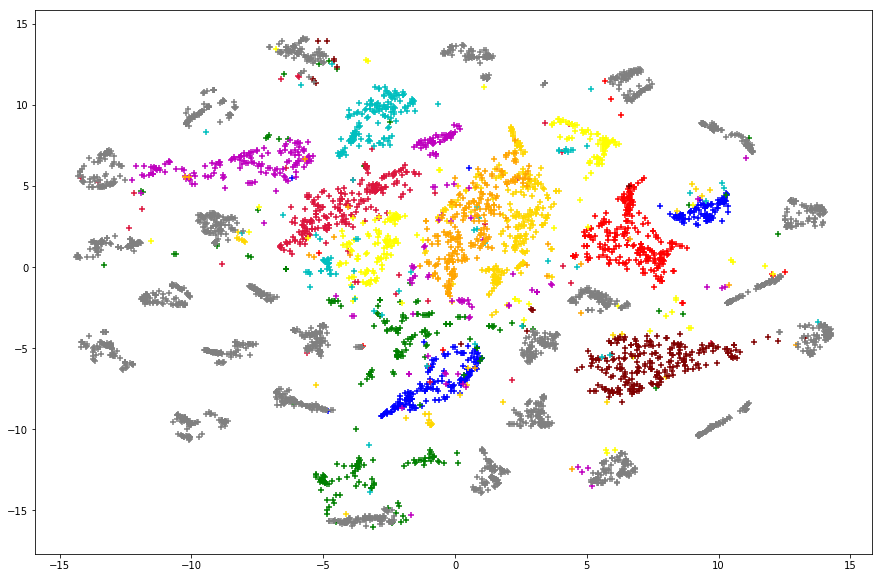

In [127]:
fig = plt.figure(figsize=(15, 10))
colors = [
    'r',
    'b',
    'g',
    'crimson',
    'gold',
    'yellow',
    'maroon',
    'm',
    'c',
    'orange'
]
for i in range(10):
    plt.scatter(hfull_2d[yfull==i, 0], hfull_2d[yfull==i, 1], marker='+', color=colors[i])

plt.scatter(hfull_2d[yfull< 0, 0], hfull_2d[yfull<0, 1], marker='+', color='gray')
plt.show()

In [117]:
print(hgen.shape)

(900, 1, 28, 28)
